Here I work on building a Perceptron Classifier model. I then import the iris dataset to test the model.


Building the model.

In [1]:
import numpy as np


class Perceptron:
    """Perceptron classifier.

    Parameters
    ______________
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset
    random_state : int
        Random number generator seed for random weight
        initialization.


    Attributes
    --------------
    w_ : 1d-array
        Weights after fitting.
    b_ : Scalar
        Biase unit after fitting.

    errors_ : list
        Number of misclassifications (updates) in each epoch.

    """

    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, x, y):
        """Fit training data.

        Parameters
        -------------
        x : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of
          examples and n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.


        Returns
        -------------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01,
                              size=X.shape[1])
        self.b_ = np.float_(0.)
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_ += update * xi
                self.b_ += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_) + self.b_

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, 0)


Importing the iris data set and importing pandas to store the dataset as a dataframe object

In [2]:
import os
import pandas as pd
s = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
print('From URL:', s)
df = pd.read_csv(s, header=None, encoding='utf-8')
df.tail()

From URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


For simplicity, I only select the setosa and versicolor types. I convert the setosa and versicolor class labels into two integer class labels (via the np.where statement) where setosa is 0 and versicolor is 1.

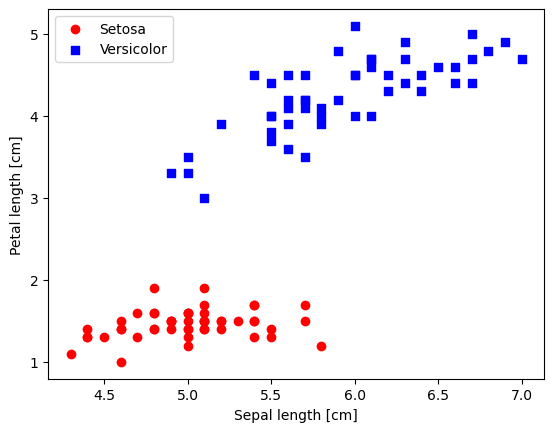

In [4]:
import matplotlib.pyplot as plt
import numpy as np
#select setosa and versicolor which are located in column 4 in the dataframe
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', 0, 1)
#extract sepal length and petal length which are stored in columns 0 and 2 in the dataframe
X = df.iloc[0:100, [0, 2]].values
#plot data
plt.scatter(X[:50, 0], X[:50, 1],
           color='red', marker='o', label='Setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
           color='blue', marker='s', label='Versicolor')
plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc='upper left')
plt.show()

In the above scatter plot, a linear decision boundary can be determined as sufficient to separate setosa from versicolor flowers. We will use the perceptron classifier to classify the flowers in this dataset.

Below we train the perceptron algorithm.

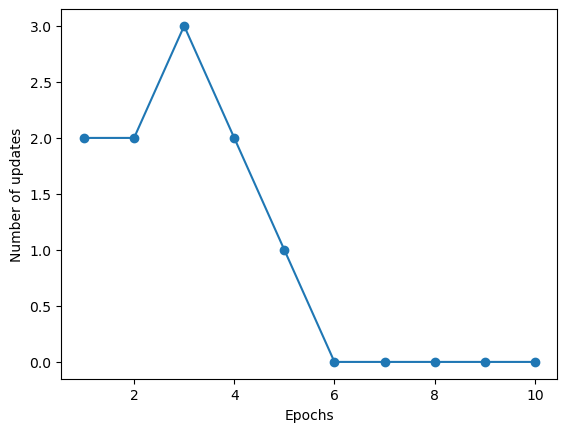

In [14]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)
plt.plot(range(1, len(ppn.errors_) + 1),
        ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

The model converges after the sixth epoch. It should now be able to classify the training examples.

Below a function is created to visualize the decision boundaries for two dimensional datasets. We define a number of colors and markers and create a colormap with ListedColormap. We then determine the minimum and maximum values for the two features. Using those feature vectors we create a pair of grid arrays (xx1, xx2).

In [19]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'grey', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 0].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                          np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    #plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                   y=X[y == cl, 1],
                   alpha=0.8,
                   c=colors[idx],
                   label=f'Class {cl}',
                   edgecolor='black')
        

Below we use the plot_decision_regions function created above to test the perceptrons ability to learn decision boundaries in the iris dataset

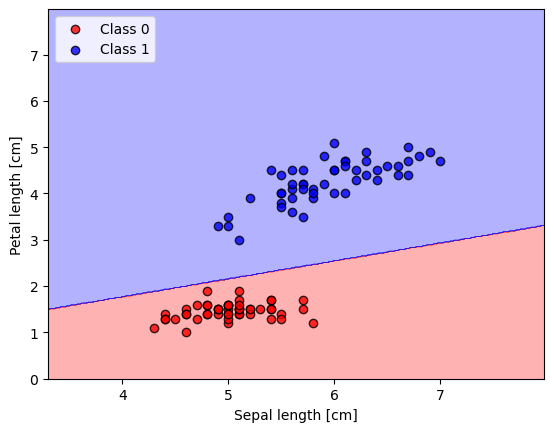

In [20]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc='upper left')
plt.show()

Summary:
We see the perceptron was able to classify all the examples in the dataset.